In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset//Test'

In [3]:
folders = glob('Dataset/Train/*')

In [4]:
folders

['Dataset/Train\\Aston martin car',
 'Dataset/Train\\Bmw car',
 'Dataset/Train\\Bugatti car',
 'Dataset/Train\\ferrai car',
 'Dataset/Train\\Lamborgini car',
 'Dataset/Train\\Mahindra car',
 'Dataset/Train\\Mercedes car',
 'Dataset/Train\\Porshce car',
 'Dataset/Train\\RollsRoyce car',
 'Dataset/Train\\Tesla car',
 'Dataset/Train\\Toyota car']

In [5]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 11, activation = 'softmax'))
#use 7 for notes

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 86 images belonging to 11 classes.


In [9]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 86 images belonging to 11 classes.


In [10]:
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2000,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/2000


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3/3 [==============================] - 6s 2s/step - loss: 11.0805 - acc: 0.0930 - val_loss: 6.7828 - val_acc: 0.0581
Epoch 2/2000
3/3 [==============================] - 5s 2s/step - loss: 4.9641 - acc: 0.1047 - val_loss: 3.0171 - val_acc: 0.1628
Epoch 3/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7960 - acc: 0.1395 - val_loss: 2.4415 - val_acc: 0.1047
Epoch 4/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4147 - acc: 0.1047 - val_loss: 2.3649 - val_acc: 0.1047
Epoch 5/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3680 - acc: 0.1163 - val_loss: 2.3737 - val_acc: 0.1628
Epoch 6/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3754 - acc: 0.1744 - val_loss: 2.3545 - val_acc: 0.1860
Epoch 7/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3670 - acc: 0.0930 - val_loss: 2.3067 - val_acc: 0.1512
Epoch 8/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3204 - acc: 0.1395 - val_loss: 2.237

3/3 [==============================] - 5s 2s/step - loss: 0.8532 - acc: 0.7558 - val_loss: 0.6811 - val_acc: 0.8023
Epoch 29/2000
3/3 [==============================] - 5s 2s/step - loss: 0.9270 - acc: 0.7093 - val_loss: 0.6679 - val_acc: 0.8488
Epoch 30/2000
3/3 [==============================] - 5s 2s/step - loss: 0.9235 - acc: 0.7558 - val_loss: 0.6103 - val_acc: 0.8256
Epoch 31/2000
3/3 [==============================] - 5s 2s/step - loss: 0.7631 - acc: 0.7674 - val_loss: 0.4856 - val_acc: 0.8605
Epoch 32/2000
3/3 [==============================] - 5s 2s/step - loss: 0.9053 - acc: 0.6977 - val_loss: 0.4823 - val_acc: 0.8488
Epoch 33/2000
3/3 [==============================] - 5s 2s/step - loss: 0.6773 - acc: 0.8372 - val_loss: 0.4228 - val_acc: 0.9302
Epoch 34/2000
3/3 [==============================] - 5s 2s/step - loss: 0.5829 - acc: 0.8605 - val_loss: 0.4361 - val_acc: 0.8837
Epoch 35/2000
3/3 [==============================] - 5s 2s/step - loss: 0.4823 - acc: 0.9302 - val_loss:

Epoch 56/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1364 - acc: 0.9651 - val_loss: 0.1010 - val_acc: 0.9884
Epoch 57/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1636 - acc: 0.9651 - val_loss: 0.0780 - val_acc: 0.9884
Epoch 58/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1320 - acc: 0.9535 - val_loss: 0.0780 - val_acc: 0.9884
Epoch 59/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1227 - acc: 0.9884 - val_loss: 0.0867 - val_acc: 0.9884
Epoch 60/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1338 - acc: 0.9884 - val_loss: 0.0683 - val_acc: 0.9884
Epoch 61/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1478 - acc: 0.9767 - val_loss: 0.1731 - val_acc: 0.9535
Epoch 62/2000
3/3 [==============================] - 5s 2s/step - loss: 0.3635 - acc: 0.9186 - val_loss: 0.0727 - val_acc: 0.9767
Epoch 63/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0534 - acc: 1.00

3/3 [==============================] - 5s 2s/step - loss: 0.0252 - acc: 1.0000 - val_loss: 0.0306 - val_acc: 1.0000
Epoch 84/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0495 - acc: 0.9767 - val_loss: 0.0183 - val_acc: 1.0000
Epoch 85/2000
3/3 [==============================] - 6s 2s/step - loss: 0.0282 - acc: 1.0000 - val_loss: 0.0219 - val_acc: 1.0000
Epoch 86/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0223 - acc: 1.0000 - val_loss: 0.0447 - val_acc: 0.9767
Epoch 87/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0402 - acc: 0.9884 - val_loss: 0.0619 - val_acc: 0.9767
Epoch 88/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0387 - acc: 0.9767 - val_loss: 0.0372 - val_acc: 0.9884
Epoch 89/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0600 - acc: 0.9884 - val_loss: 0.0331 - val_acc: 0.9884
Epoch 90/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0580 - acc: 0.9535 - val_loss:

3/3 [==============================] - 5s 2s/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.0104 - val_acc: 1.0000
Epoch 111/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0110 - acc: 1.0000 - val_loss: 0.0104 - val_acc: 1.0000
Epoch 112/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 113/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 114/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0151 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 115/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 1.0000
Epoch 116/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000
Epoch 117/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0036 - acc: 1.0000 - va

Epoch 138/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 139/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 140/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 141/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0158 - val_acc: 0.9884
Epoch 142/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 143/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 144/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0109 - acc: 0.9884 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 145/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0192 - a

3/3 [==============================] - 5s 2s/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 166/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0343 - acc: 0.9884 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 167/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.0092 - val_acc: 1.0000
Epoch 168/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0406 - acc: 0.9884 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 169/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 170/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 171/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 172/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0051 - acc: 1.0000 - va

3/3 [==============================] - 6s 2s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 193/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 194/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 195/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 196/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0039 - acc: 1.0000 - val_loss: 8.0121e-04 - val_acc: 1.0000
Epoch 197/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5949e-04 - val_acc: 1.0000
Epoch 198/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 8.5546e-04 - val_acc: 1.0000
Epoch 199/2000
3/3 [==============================] - 5s 2s/step - loss: 9.0229e-04 - 

3/3 [==============================] - 5s 2s/step - loss: 4.0840e-04 - acc: 1.0000 - val_loss: 5.0749e-04 - val_acc: 1.0000
Epoch 219/2000
3/3 [==============================] - 5s 2s/step - loss: 6.3157e-04 - acc: 1.0000 - val_loss: 5.7175e-04 - val_acc: 1.0000
Epoch 220/2000
3/3 [==============================] - 5s 2s/step - loss: 4.1010e-04 - acc: 1.0000 - val_loss: 4.8265e-04 - val_acc: 1.0000
Epoch 221/2000
3/3 [==============================] - 5s 2s/step - loss: 5.6916e-04 - acc: 1.0000 - val_loss: 5.5285e-04 - val_acc: 1.0000
Epoch 222/2000
3/3 [==============================] - 5s 2s/step - loss: 4.1763e-04 - acc: 1.0000 - val_loss: 4.7846e-04 - val_acc: 1.0000
Epoch 223/2000
3/3 [==============================] - 5s 2s/step - loss: 3.8820e-04 - acc: 1.0000 - val_loss: 4.9855e-04 - val_acc: 1.0000
Epoch 224/2000
3/3 [==============================] - 5s 2s/step - loss: 5.6550e-04 - acc: 1.0000 - val_loss: 5.1855e-04 - val_acc: 1.0000
Epoch 225/2000
3/3 [======================

3/3 [==============================] - 5s 2s/step - loss: 3.9558e-04 - acc: 1.0000 - val_loss: 3.4412e-04 - val_acc: 1.0000
Epoch 245/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1287e-04 - acc: 1.0000 - val_loss: 3.8473e-04 - val_acc: 1.0000
Epoch 246/2000
3/3 [==============================] - 5s 2s/step - loss: 4.2926e-04 - acc: 1.0000 - val_loss: 3.8399e-04 - val_acc: 1.0000
Epoch 247/2000
3/3 [==============================] - 5s 2s/step - loss: 6.2654e-04 - acc: 1.0000 - val_loss: 3.8230e-04 - val_acc: 1.0000
Epoch 248/2000
3/3 [==============================] - 5s 2s/step - loss: 2.8570e-04 - acc: 1.0000 - val_loss: 3.8412e-04 - val_acc: 1.0000
Epoch 249/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1088e-04 - acc: 1.0000 - val_loss: 3.4019e-04 - val_acc: 1.0000
Epoch 250/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7926e-04 - acc: 1.0000 - val_loss: 3.4146e-04 - val_acc: 1.0000
Epoch 251/2000
3/3 [======================

Epoch 270/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3350e-04 - acc: 1.0000 - val_loss: 2.6737e-04 - val_acc: 1.0000
Epoch 271/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3004e-04 - acc: 1.0000 - val_loss: 2.7738e-04 - val_acc: 1.0000
Epoch 272/2000
3/3 [==============================] - 5s 2s/step - loss: 7.4253e-04 - acc: 1.0000 - val_loss: 2.6156e-04 - val_acc: 1.0000
Epoch 273/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9340e-04 - acc: 1.0000 - val_loss: 2.4796e-04 - val_acc: 1.0000
Epoch 274/2000
3/3 [==============================] - 5s 2s/step - loss: 2.8881e-04 - acc: 1.0000 - val_loss: 2.4656e-04 - val_acc: 1.0000
Epoch 275/2000
3/3 [==============================] - 5s 2s/step - loss: 7.4826e-04 - acc: 1.0000 - val_loss: 2.4492e-04 - val_acc: 1.0000
Epoch 276/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5349e-04 - acc: 1.0000 - val_loss: 2.7501e-04 - val_acc: 1.0000
Epoch 277/2000
3/3 [=======

Epoch 296/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9245e-04 - acc: 1.0000 - val_loss: 2.8730e-04 - val_acc: 1.0000
Epoch 297/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3761e-04 - acc: 1.0000 - val_loss: 2.5577e-04 - val_acc: 1.0000
Epoch 298/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5548e-04 - acc: 1.0000 - val_loss: 2.6404e-04 - val_acc: 1.0000
Epoch 299/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8743e-04 - acc: 1.0000 - val_loss: 2.4110e-04 - val_acc: 1.0000
Epoch 300/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6268e-04 - acc: 1.0000 - val_loss: 2.5495e-04 - val_acc: 1.0000
Epoch 301/2000
3/3 [==============================] - 5s 2s/step - loss: 5.9964e-04 - acc: 1.0000 - val_loss: 2.5421e-04 - val_acc: 1.0000
Epoch 302/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3299e-04 - acc: 1.0000 - val_loss: 2.6554e-04 - val_acc: 1.0000
Epoch 303/2000
3/3 [=======

3/3 [==============================] - 5s 2s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.1519e-04 - val_acc: 1.0000
Epoch 323/2000
3/3 [==============================] - 5s 2s/step - loss: 5.1867e-04 - acc: 1.0000 - val_loss: 3.4253e-04 - val_acc: 1.0000
Epoch 324/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6881e-04 - acc: 1.0000 - val_loss: 3.5019e-04 - val_acc: 1.0000
Epoch 325/2000
3/3 [==============================] - 5s 2s/step - loss: 4.3008e-04 - acc: 1.0000 - val_loss: 3.3780e-04 - val_acc: 1.0000
Epoch 326/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.6024e-04 - val_acc: 1.0000
Epoch 327/2000
3/3 [==============================] - 5s 2s/step - loss: 5.5974e-04 - acc: 1.0000 - val_loss: 3.7721e-04 - val_acc: 1.0000
Epoch 328/2000
3/3 [==============================] - 5s 2s/step - loss: 5.6235e-04 - acc: 1.0000 - val_loss: 3.9630e-04 - val_acc: 1.0000
Epoch 329/2000
3/3 [==============================

Epoch 348/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3681e-04 - acc: 1.0000 - val_loss: 2.1068e-04 - val_acc: 1.0000
Epoch 349/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1461e-04 - acc: 1.0000 - val_loss: 2.0880e-04 - val_acc: 1.0000
Epoch 350/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7643e-04 - acc: 1.0000 - val_loss: 2.1529e-04 - val_acc: 1.0000
Epoch 351/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8570e-04 - acc: 1.0000 - val_loss: 2.5044e-04 - val_acc: 1.0000
Epoch 352/2000
3/3 [==============================] - 5s 2s/step - loss: 5.0106e-04 - acc: 1.0000 - val_loss: 2.4067e-04 - val_acc: 1.0000
Epoch 353/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1328e-04 - acc: 1.0000 - val_loss: 2.6456e-04 - val_acc: 1.0000
Epoch 354/2000
3/3 [==============================] - 5s 2s/step - loss: 4.3746e-04 - acc: 1.0000 - val_loss: 2.6950e-04 - val_acc: 1.0000
Epoch 355/2000
3/3 [=======

Epoch 374/2000
3/3 [==============================] - 5s 2s/step - loss: 2.8937e-04 - acc: 1.0000 - val_loss: 1.6108e-04 - val_acc: 1.0000
Epoch 375/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7384e-04 - acc: 1.0000 - val_loss: 1.6679e-04 - val_acc: 1.0000
Epoch 376/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1099e-04 - acc: 1.0000 - val_loss: 1.6858e-04 - val_acc: 1.0000
Epoch 377/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8378e-04 - acc: 1.0000 - val_loss: 1.5795e-04 - val_acc: 1.0000
Epoch 378/2000
3/3 [==============================] - 6s 2s/step - loss: 1.5706e-04 - acc: 1.0000 - val_loss: 1.6310e-04 - val_acc: 1.0000
Epoch 379/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4303e-04 - acc: 1.0000 - val_loss: 1.6013e-04 - val_acc: 1.0000
Epoch 380/2000
3/3 [==============================] - 5s 2s/step - loss: 2.2963e-04 - acc: 1.0000 - val_loss: 1.5294e-04 - val_acc: 1.0000
Epoch 381/2000
3/3 [=======

Epoch 400/2000
3/3 [==============================] - 5s 2s/step - loss: 8.9972e-05 - acc: 1.0000 - val_loss: 1.2028e-04 - val_acc: 1.0000
Epoch 401/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9210e-04 - acc: 1.0000 - val_loss: 1.1848e-04 - val_acc: 1.0000
Epoch 402/2000
3/3 [==============================] - 5s 2s/step - loss: 1.0036e-04 - acc: 1.0000 - val_loss: 1.1708e-04 - val_acc: 1.0000
Epoch 403/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1410e-04 - acc: 1.0000 - val_loss: 1.2809e-04 - val_acc: 1.0000
Epoch 404/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5558e-04 - acc: 1.0000 - val_loss: 1.2135e-04 - val_acc: 1.0000
Epoch 405/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3134e-04 - acc: 1.0000 - val_loss: 1.3320e-04 - val_acc: 1.0000
Epoch 406/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8853e-04 - acc: 1.0000 - val_loss: 1.2385e-04 - val_acc: 1.0000
Epoch 407/2000
3/3 [=======

Epoch 426/2000
3/3 [==============================] - 5s 2s/step - loss: 9.3663e-05 - acc: 1.0000 - val_loss: 9.8688e-05 - val_acc: 1.0000
Epoch 427/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2415e-04 - acc: 1.0000 - val_loss: 9.4827e-05 - val_acc: 1.0000
Epoch 428/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2487e-04 - acc: 1.0000 - val_loss: 9.4302e-05 - val_acc: 1.0000
Epoch 429/2000
3/3 [==============================] - 6s 2s/step - loss: 1.2161e-04 - acc: 1.0000 - val_loss: 9.6639e-05 - val_acc: 1.0000
Epoch 430/2000
3/3 [==============================] - 5s 2s/step - loss: 9.9047e-05 - acc: 1.0000 - val_loss: 9.9832e-05 - val_acc: 1.0000
Epoch 431/2000
3/3 [==============================] - 5s 2s/step - loss: 1.0147e-04 - acc: 1.0000 - val_loss: 1.0078e-04 - val_acc: 1.0000
Epoch 432/2000
3/3 [==============================] - 5s 2s/step - loss: 7.0759e-05 - acc: 1.0000 - val_loss: 1.0076e-04 - val_acc: 1.0000
Epoch 433/2000
3/3 [=======

Epoch 452/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0034 - acc: 1.0000 - val_loss: 2.3882e-04 - val_acc: 1.0000
Epoch 453/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4546e-04 - acc: 1.0000 - val_loss: 7.0326e-04 - val_acc: 1.0000
Epoch 454/2000
3/3 [==============================] - 5s 2s/step - loss: 8.0980e-04 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 455/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 6.4453e-04 - val_acc: 1.0000
Epoch 456/2000
3/3 [==============================] - 5s 2s/step - loss: 8.3725e-04 - acc: 1.0000 - val_loss: 2.2541e-04 - val_acc: 1.0000
Epoch 457/2000
3/3 [==============================] - 5s 2s/step - loss: 6.6715e-04 - acc: 1.0000 - val_loss: 1.2081e-04 - val_acc: 1.0000
Epoch 458/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3533e-04 - acc: 1.0000 - val_loss: 9.1791e-05 - val_acc: 1.0000
Epoch 459/2000
3/3 [===================

Epoch 478/2000
3/3 [==============================] - 5s 2s/step - loss: 1.0388e-04 - acc: 1.0000 - val_loss: 8.7807e-05 - val_acc: 1.0000
Epoch 479/2000
3/3 [==============================] - 5s 2s/step - loss: 7.7843e-05 - acc: 1.0000 - val_loss: 8.8601e-05 - val_acc: 1.0000
Epoch 480/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4749e-04 - acc: 1.0000 - val_loss: 9.3641e-05 - val_acc: 1.0000
Epoch 481/2000
3/3 [==============================] - 5s 2s/step - loss: 1.0523e-04 - acc: 1.0000 - val_loss: 8.7451e-05 - val_acc: 1.0000
Epoch 482/2000
3/3 [==============================] - 5s 2s/step - loss: 9.3696e-05 - acc: 1.0000 - val_loss: 1.0074e-04 - val_acc: 1.0000
Epoch 483/2000
3/3 [==============================] - 5s 2s/step - loss: 8.7653e-05 - acc: 1.0000 - val_loss: 9.7079e-05 - val_acc: 1.0000
Epoch 484/2000
3/3 [==============================] - 5s 2s/step - loss: 7.2342e-05 - acc: 1.0000 - val_loss: 9.7210e-05 - val_acc: 1.0000
Epoch 485/2000
3/3 [=======

Epoch 504/2000
3/3 [==============================] - 6s 2s/step - loss: 7.1625e-05 - acc: 1.0000 - val_loss: 1.0414e-04 - val_acc: 1.0000
Epoch 505/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7520e-04 - acc: 1.0000 - val_loss: 1.0032e-04 - val_acc: 1.0000
Epoch 506/2000
3/3 [==============================] - 5s 2s/step - loss: 5.1781e-05 - acc: 1.0000 - val_loss: 9.0755e-05 - val_acc: 1.0000
Epoch 507/2000
3/3 [==============================] - 5s 2s/step - loss: 6.5175e-05 - acc: 1.0000 - val_loss: 1.0194e-04 - val_acc: 1.0000
Epoch 508/2000
3/3 [==============================] - 5s 2s/step - loss: 7.5165e-05 - acc: 1.0000 - val_loss: 9.5370e-05 - val_acc: 1.0000
Epoch 509/2000
3/3 [==============================] - 5s 2s/step - loss: 9.1607e-05 - acc: 1.0000 - val_loss: 9.1281e-05 - val_acc: 1.0000
Epoch 510/2000
3/3 [==============================] - 5s 2s/step - loss: 6.4089e-05 - acc: 1.0000 - val_loss: 8.3632e-05 - val_acc: 1.0000
Epoch 511/2000
3/3 [=======

Epoch 530/2000
3/3 [==============================] - 5s 2s/step - loss: 5.6508e-05 - acc: 1.0000 - val_loss: 7.7022e-05 - val_acc: 1.0000
Epoch 531/2000
3/3 [==============================] - 5s 2s/step - loss: 5.2186e-05 - acc: 1.0000 - val_loss: 7.7138e-05 - val_acc: 1.0000
Epoch 532/2000
3/3 [==============================] - 5s 2s/step - loss: 8.8276e-05 - acc: 1.0000 - val_loss: 7.5235e-05 - val_acc: 1.0000
Epoch 533/2000
3/3 [==============================] - 5s 2s/step - loss: 9.1574e-05 - acc: 1.0000 - val_loss: 7.4117e-05 - val_acc: 1.0000
Epoch 534/2000
3/3 [==============================] - 5s 2s/step - loss: 4.9498e-05 - acc: 1.0000 - val_loss: 7.2415e-05 - val_acc: 1.0000
Epoch 535/2000
3/3 [==============================] - 5s 2s/step - loss: 5.9396e-05 - acc: 1.0000 - val_loss: 7.7483e-05 - val_acc: 1.0000
Epoch 536/2000
3/3 [==============================] - 5s 2s/step - loss: 7.7937e-05 - acc: 1.0000 - val_loss: 7.5494e-05 - val_acc: 1.0000
Epoch 537/2000
3/3 [=======

Epoch 556/2000
3/3 [==============================] - 5s 2s/step - loss: 5.2360e-04 - acc: 1.0000 - val_loss: 5.7933e-05 - val_acc: 1.0000
Epoch 557/2000
3/3 [==============================] - 5s 2s/step - loss: 5.9804e-05 - acc: 1.0000 - val_loss: 5.5157e-05 - val_acc: 1.0000
Epoch 558/2000
3/3 [==============================] - 5s 2s/step - loss: 5.6176e-05 - acc: 1.0000 - val_loss: 6.2160e-05 - val_acc: 1.0000
Epoch 559/2000
3/3 [==============================] - 5s 2s/step - loss: 9.5057e-05 - acc: 1.0000 - val_loss: 6.7337e-05 - val_acc: 1.0000
Epoch 560/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9811e-04 - acc: 1.0000 - val_loss: 8.3436e-05 - val_acc: 1.0000
Epoch 561/2000
3/3 [==============================] - 5s 2s/step - loss: 9.7119e-05 - acc: 1.0000 - val_loss: 7.9492e-05 - val_acc: 1.0000
Epoch 562/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3208e-04 - acc: 1.0000 - val_loss: 8.0847e-05 - val_acc: 1.0000
Epoch 563/2000
3/3 [=======

Epoch 582/2000
3/3 [==============================] - 5s 2s/step - loss: 5.4088e-05 - acc: 1.0000 - val_loss: 6.1565e-05 - val_acc: 1.0000
Epoch 583/2000
3/3 [==============================] - 5s 2s/step - loss: 4.8647e-05 - acc: 1.0000 - val_loss: 5.7549e-05 - val_acc: 1.0000
Epoch 584/2000
3/3 [==============================] - 5s 2s/step - loss: 6.5117e-05 - acc: 1.0000 - val_loss: 6.6008e-05 - val_acc: 1.0000
Epoch 585/2000
3/3 [==============================] - 5s 2s/step - loss: 7.1715e-05 - acc: 1.0000 - val_loss: 6.3307e-05 - val_acc: 1.0000
Epoch 586/2000
3/3 [==============================] - 5s 2s/step - loss: 6.1725e-05 - acc: 1.0000 - val_loss: 5.9362e-05 - val_acc: 1.0000
Epoch 587/2000
3/3 [==============================] - 5s 2s/step - loss: 7.2177e-05 - acc: 1.0000 - val_loss: 6.3218e-05 - val_acc: 1.0000
Epoch 588/2000
3/3 [==============================] - 5s 2s/step - loss: 7.8383e-05 - acc: 1.0000 - val_loss: 6.5883e-05 - val_acc: 1.0000
Epoch 589/2000
3/3 [=======

Epoch 608/2000
3/3 [==============================] - 5s 2s/step - loss: 3.5981e-05 - acc: 1.0000 - val_loss: 5.4735e-05 - val_acc: 1.0000
Epoch 609/2000
3/3 [==============================] - 5s 2s/step - loss: 6.1255e-05 - acc: 1.0000 - val_loss: 5.3430e-05 - val_acc: 1.0000
Epoch 610/2000
3/3 [==============================] - 5s 2s/step - loss: 4.4683e-05 - acc: 1.0000 - val_loss: 5.2474e-05 - val_acc: 1.0000
Epoch 611/2000
3/3 [==============================] - 5s 2s/step - loss: 4.4912e-05 - acc: 1.0000 - val_loss: 4.9612e-05 - val_acc: 1.0000
Epoch 612/2000
3/3 [==============================] - 5s 2s/step - loss: 3.3566e-05 - acc: 1.0000 - val_loss: 4.8604e-05 - val_acc: 1.0000
Epoch 613/2000
3/3 [==============================] - 5s 2s/step - loss: 3.0920e-05 - acc: 1.0000 - val_loss: 5.0989e-05 - val_acc: 1.0000
Epoch 614/2000
3/3 [==============================] - 5s 2s/step - loss: 5.9625e-05 - acc: 1.0000 - val_loss: 5.0336e-05 - val_acc: 1.0000
Epoch 615/2000
3/3 [=======

Epoch 634/2000
3/3 [==============================] - 5s 2s/step - loss: 4.1508e-05 - acc: 1.0000 - val_loss: 4.4159e-05 - val_acc: 1.0000
Epoch 635/2000
3/3 [==============================] - 5s 2s/step - loss: 8.2827e-05 - acc: 1.0000 - val_loss: 4.1583e-05 - val_acc: 1.0000
Epoch 636/2000
3/3 [==============================] - 5s 2s/step - loss: 6.0576e-05 - acc: 1.0000 - val_loss: 4.4284e-05 - val_acc: 1.0000
Epoch 637/2000
3/3 [==============================] - 5s 2s/step - loss: 8.4683e-05 - acc: 1.0000 - val_loss: 4.5270e-05 - val_acc: 1.0000
Epoch 638/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6241e-05 - acc: 1.0000 - val_loss: 4.4138e-05 - val_acc: 1.0000
Epoch 639/2000
3/3 [==============================] - 5s 2s/step - loss: 5.0983e-05 - acc: 1.0000 - val_loss: 4.4798e-05 - val_acc: 1.0000
Epoch 640/2000
3/3 [==============================] - 5s 2s/step - loss: 3.6638e-05 - acc: 1.0000 - val_loss: 4.7727e-05 - val_acc: 1.0000
Epoch 641/2000
3/3 [=======

Epoch 660/2000
3/3 [==============================] - 5s 2s/step - loss: 3.4478e-05 - acc: 1.0000 - val_loss: 5.1204e-05 - val_acc: 1.0000
Epoch 661/2000
3/3 [==============================] - 5s 2s/step - loss: 4.3037e-05 - acc: 1.0000 - val_loss: 5.3312e-05 - val_acc: 1.0000
Epoch 662/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1316e-05 - acc: 1.0000 - val_loss: 5.3933e-05 - val_acc: 1.0000
Epoch 663/2000
3/3 [==============================] - 5s 2s/step - loss: 4.1856e-05 - acc: 1.0000 - val_loss: 5.1997e-05 - val_acc: 1.0000
Epoch 664/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9495e-05 - acc: 1.0000 - val_loss: 5.0618e-05 - val_acc: 1.0000
Epoch 665/2000
3/3 [==============================] - 5s 2s/step - loss: 3.2816e-05 - acc: 1.0000 - val_loss: 5.6986e-05 - val_acc: 1.0000
Epoch 666/2000
3/3 [==============================] - 5s 2s/step - loss: 4.4697e-05 - acc: 1.0000 - val_loss: 4.8066e-05 - val_acc: 1.0000
Epoch 667/2000
3/3 [=======

Epoch 686/2000
3/3 [==============================] - 5s 2s/step - loss: 4.0881e-05 - acc: 1.0000 - val_loss: 4.8944e-05 - val_acc: 1.0000
Epoch 687/2000
3/3 [==============================] - 5s 2s/step - loss: 4.3944e-05 - acc: 1.0000 - val_loss: 4.8740e-05 - val_acc: 1.0000
Epoch 688/2000
3/3 [==============================] - 5s 2s/step - loss: 4.1161e-05 - acc: 1.0000 - val_loss: 4.8510e-05 - val_acc: 1.0000
Epoch 689/2000
3/3 [==============================] - 5s 2s/step - loss: 3.0965e-05 - acc: 1.0000 - val_loss: 4.9947e-05 - val_acc: 1.0000
Epoch 690/2000
3/3 [==============================] - 5s 2s/step - loss: 3.9360e-05 - acc: 1.0000 - val_loss: 4.9302e-05 - val_acc: 1.0000
Epoch 691/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3292e-05 - acc: 1.0000 - val_loss: 4.8466e-05 - val_acc: 1.0000
Epoch 692/2000
3/3 [==============================] - 5s 2s/step - loss: 4.7384e-05 - acc: 1.0000 - val_loss: 5.6355e-05 - val_acc: 1.0000
Epoch 693/2000
3/3 [=======

Epoch 712/2000
3/3 [==============================] - 5s 2s/step - loss: 4.2176e-05 - acc: 1.0000 - val_loss: 4.7475e-05 - val_acc: 1.0000
Epoch 713/2000
3/3 [==============================] - 5s 2s/step - loss: 3.2386e-05 - acc: 1.0000 - val_loss: 4.9892e-05 - val_acc: 1.0000
Epoch 714/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1648e-05 - acc: 1.0000 - val_loss: 4.8838e-05 - val_acc: 1.0000
Epoch 715/2000
3/3 [==============================] - 5s 2s/step - loss: 6.4988e-05 - acc: 1.0000 - val_loss: 4.9120e-05 - val_acc: 1.0000
Epoch 716/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4823e-05 - acc: 1.0000 - val_loss: 4.9357e-05 - val_acc: 1.0000
Epoch 717/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3140e-05 - acc: 1.0000 - val_loss: 5.1073e-05 - val_acc: 1.0000
Epoch 718/2000
3/3 [==============================] - 5s 2s/step - loss: 4.0584e-05 - acc: 1.0000 - val_loss: 4.5485e-05 - val_acc: 1.0000
Epoch 719/2000
3/3 [=======

Epoch 738/2000
3/3 [==============================] - 5s 2s/step - loss: 4.7955e-05 - acc: 1.0000 - val_loss: 4.7504e-05 - val_acc: 1.0000
Epoch 739/2000
3/3 [==============================] - 5s 2s/step - loss: 3.5397e-05 - acc: 1.0000 - val_loss: 5.2192e-05 - val_acc: 1.0000
Epoch 740/2000
3/3 [==============================] - 5s 2s/step - loss: 3.2535e-05 - acc: 1.0000 - val_loss: 4.9069e-05 - val_acc: 1.0000
Epoch 741/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5711e-05 - acc: 1.0000 - val_loss: 5.0098e-05 - val_acc: 1.0000
Epoch 742/2000
3/3 [==============================] - 5s 2s/step - loss: 4.0208e-05 - acc: 1.0000 - val_loss: 4.7251e-05 - val_acc: 1.0000
Epoch 743/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3625e-05 - acc: 1.0000 - val_loss: 5.0813e-05 - val_acc: 1.0000
Epoch 744/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3030e-05 - acc: 1.0000 - val_loss: 4.9748e-05 - val_acc: 1.0000
Epoch 745/2000
3/3 [=======

Epoch 764/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6665e-05 - acc: 1.0000 - val_loss: 3.8638e-05 - val_acc: 1.0000
Epoch 765/2000
3/3 [==============================] - 5s 2s/step - loss: 3.8833e-05 - acc: 1.0000 - val_loss: 3.9809e-05 - val_acc: 1.0000
Epoch 766/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1130e-05 - acc: 1.0000 - val_loss: 4.2925e-05 - val_acc: 1.0000
Epoch 767/2000
3/3 [==============================] - 5s 2s/step - loss: 9.1927e-05 - acc: 1.0000 - val_loss: 3.8502e-05 - val_acc: 1.0000
Epoch 768/2000
3/3 [==============================] - 5s 2s/step - loss: 3.3666e-05 - acc: 1.0000 - val_loss: 4.0324e-05 - val_acc: 1.0000
Epoch 769/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1138e-05 - acc: 1.0000 - val_loss: 4.1303e-05 - val_acc: 1.0000
Epoch 770/2000
3/3 [==============================] - 5s 2s/step - loss: 2.8222e-05 - acc: 1.0000 - val_loss: 4.3142e-05 - val_acc: 1.0000
Epoch 771/2000
3/3 [=======

Epoch 790/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7367e-05 - acc: 1.0000 - val_loss: 3.3408e-05 - val_acc: 1.0000
Epoch 791/2000
3/3 [==============================] - 5s 2s/step - loss: 3.7170e-05 - acc: 1.0000 - val_loss: 3.3732e-05 - val_acc: 1.0000
Epoch 792/2000
3/3 [==============================] - 5s 2s/step - loss: 4.2467e-05 - acc: 1.0000 - val_loss: 3.3058e-05 - val_acc: 1.0000
Epoch 793/2000
3/3 [==============================] - 5s 2s/step - loss: 3.8266e-05 - acc: 1.0000 - val_loss: 3.1859e-05 - val_acc: 1.0000
Epoch 794/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1873e-05 - acc: 1.0000 - val_loss: 3.4552e-05 - val_acc: 1.0000
Epoch 795/2000
3/3 [==============================] - 5s 2s/step - loss: 3.0565e-05 - acc: 1.0000 - val_loss: 3.6091e-05 - val_acc: 1.0000
Epoch 796/2000
3/3 [==============================] - 5s 2s/step - loss: 4.9188e-05 - acc: 1.0000 - val_loss: 3.2115e-05 - val_acc: 1.0000
Epoch 797/2000
3/3 [=======

Epoch 816/2000
3/3 [==============================] - 5s 2s/step - loss: 3.0695e-05 - acc: 1.0000 - val_loss: 3.1366e-05 - val_acc: 1.0000
Epoch 817/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1489e-05 - acc: 1.0000 - val_loss: 3.0787e-05 - val_acc: 1.0000
Epoch 818/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3883e-05 - acc: 1.0000 - val_loss: 3.0787e-05 - val_acc: 1.0000
Epoch 819/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6926e-05 - acc: 1.0000 - val_loss: 3.2352e-05 - val_acc: 1.0000
Epoch 820/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4202e-05 - acc: 1.0000 - val_loss: 3.4364e-05 - val_acc: 1.0000
Epoch 821/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5301e-05 - acc: 1.0000 - val_loss: 3.5455e-05 - val_acc: 1.0000
Epoch 822/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7350e-05 - acc: 1.0000 - val_loss: 3.3348e-05 - val_acc: 1.0000
Epoch 823/2000
3/3 [=======

Epoch 842/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9132e-05 - acc: 1.0000 - val_loss: 4.1780e-05 - val_acc: 1.0000
Epoch 843/2000
3/3 [==============================] - 5s 2s/step - loss: 2.8374e-05 - acc: 1.0000 - val_loss: 4.2409e-05 - val_acc: 1.0000
Epoch 844/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9827e-05 - acc: 1.0000 - val_loss: 4.3130e-05 - val_acc: 1.0000
Epoch 845/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1021e-05 - acc: 1.0000 - val_loss: 4.1047e-05 - val_acc: 1.0000
Epoch 846/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9239e-05 - acc: 1.0000 - val_loss: 4.0398e-05 - val_acc: 1.0000
Epoch 847/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4972e-05 - acc: 1.0000 - val_loss: 3.8095e-05 - val_acc: 1.0000
Epoch 848/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8426e-05 - acc: 1.0000 - val_loss: 4.0532e-05 - val_acc: 1.0000
Epoch 849/2000
3/3 [=======

Epoch 868/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6671e-05 - acc: 1.0000 - val_loss: 2.9285e-05 - val_acc: 1.0000
Epoch 869/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4854e-05 - acc: 1.0000 - val_loss: 3.0840e-05 - val_acc: 1.0000
Epoch 870/2000
3/3 [==============================] - 5s 2s/step - loss: 3.8180e-05 - acc: 1.0000 - val_loss: 2.9940e-05 - val_acc: 1.0000
Epoch 871/2000
3/3 [==============================] - 5s 2s/step - loss: 2.2250e-05 - acc: 1.0000 - val_loss: 3.1492e-05 - val_acc: 1.0000
Epoch 872/2000
3/3 [==============================] - 5s 2s/step - loss: 3.4653e-05 - acc: 1.0000 - val_loss: 2.8554e-05 - val_acc: 1.0000
Epoch 873/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5575e-05 - acc: 1.0000 - val_loss: 2.8509e-05 - val_acc: 1.0000
Epoch 874/2000
3/3 [==============================] - 5s 2s/step - loss: 3.3782e-05 - acc: 1.0000 - val_loss: 3.1219e-05 - val_acc: 1.0000
Epoch 875/2000
3/3 [=======

Epoch 894/2000
3/3 [==============================] - 5s 2s/step - loss: 2.0167e-05 - acc: 1.0000 - val_loss: 3.2815e-05 - val_acc: 1.0000
Epoch 895/2000
3/3 [==============================] - 5s 2s/step - loss: 3.6430e-05 - acc: 1.0000 - val_loss: 3.1192e-05 - val_acc: 1.0000
Epoch 896/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7484e-05 - acc: 1.0000 - val_loss: 2.7889e-05 - val_acc: 1.0000
Epoch 897/2000
3/3 [==============================] - 5s 2s/step - loss: 3.2753e-05 - acc: 1.0000 - val_loss: 2.9787e-05 - val_acc: 1.0000
Epoch 898/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1884e-05 - acc: 1.0000 - val_loss: 3.2377e-05 - val_acc: 1.0000
Epoch 899/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5634e-05 - acc: 1.0000 - val_loss: 2.9104e-05 - val_acc: 1.0000
Epoch 900/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9389e-05 - acc: 1.0000 - val_loss: 3.0660e-05 - val_acc: 1.0000
Epoch 901/2000
3/3 [=======

Epoch 920/2000
3/3 [==============================] - 5s 2s/step - loss: 6.1642e-05 - acc: 1.0000 - val_loss: 3.5039e-05 - val_acc: 1.0000
Epoch 921/2000
3/3 [==============================] - 5s 2s/step - loss: 2.0563e-05 - acc: 1.0000 - val_loss: 3.4249e-05 - val_acc: 1.0000
Epoch 922/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4296e-05 - acc: 1.0000 - val_loss: 3.5113e-05 - val_acc: 1.0000
Epoch 923/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1084e-05 - acc: 1.0000 - val_loss: 3.2683e-05 - val_acc: 1.0000
Epoch 924/2000
3/3 [==============================] - 5s 2s/step - loss: 2.0825e-05 - acc: 1.0000 - val_loss: 3.6090e-05 - val_acc: 1.0000
Epoch 925/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6092e-05 - acc: 1.0000 - val_loss: 3.5730e-05 - val_acc: 1.0000
Epoch 926/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6137e-05 - acc: 1.0000 - val_loss: 3.5594e-05 - val_acc: 1.0000
Epoch 927/2000
3/3 [=======

Epoch 946/2000
3/3 [==============================] - 5s 2s/step - loss: 3.0902e-05 - acc: 1.0000 - val_loss: 3.4936e-05 - val_acc: 1.0000
Epoch 947/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9370e-05 - acc: 1.0000 - val_loss: 3.1410e-05 - val_acc: 1.0000
Epoch 948/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8185e-05 - acc: 1.0000 - val_loss: 3.0417e-05 - val_acc: 1.0000
Epoch 949/2000
3/3 [==============================] - 5s 2s/step - loss: 2.0372e-05 - acc: 1.0000 - val_loss: 3.0184e-05 - val_acc: 1.0000
Epoch 950/2000
3/3 [==============================] - 5s 2s/step - loss: 2.2539e-05 - acc: 1.0000 - val_loss: 2.7114e-05 - val_acc: 1.0000
Epoch 951/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5318e-05 - acc: 1.0000 - val_loss: 2.7372e-05 - val_acc: 1.0000
Epoch 952/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9572e-05 - acc: 1.0000 - val_loss: 2.6536e-05 - val_acc: 1.0000
Epoch 953/2000
3/3 [=======

Epoch 972/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7438e-05 - acc: 1.0000 - val_loss: 4.1730e-05 - val_acc: 1.0000
Epoch 973/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1688e-05 - acc: 1.0000 - val_loss: 4.0235e-05 - val_acc: 1.0000
Epoch 974/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6224e-05 - acc: 1.0000 - val_loss: 4.1188e-05 - val_acc: 1.0000
Epoch 975/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9445e-05 - acc: 1.0000 - val_loss: 4.2614e-05 - val_acc: 1.0000
Epoch 976/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5728e-05 - acc: 1.0000 - val_loss: 4.0654e-05 - val_acc: 1.0000
Epoch 977/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6890e-05 - acc: 1.0000 - val_loss: 4.6509e-05 - val_acc: 1.0000
Epoch 978/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9613e-05 - acc: 1.0000 - val_loss: 4.0192e-05 - val_acc: 1.0000
Epoch 979/2000
3/3 [=======

Epoch 998/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6065e-05 - acc: 1.0000 - val_loss: 3.2200e-05 - val_acc: 1.0000
Epoch 999/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6941e-05 - acc: 1.0000 - val_loss: 3.4750e-05 - val_acc: 1.0000
Epoch 1000/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3687e-05 - acc: 1.0000 - val_loss: 3.1791e-05 - val_acc: 1.0000
Epoch 1001/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5924e-05 - acc: 1.0000 - val_loss: 3.7522e-05 - val_acc: 1.0000
Epoch 1002/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7145e-05 - acc: 1.0000 - val_loss: 3.0875e-05 - val_acc: 1.0000
Epoch 1003/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5282e-05 - acc: 1.0000 - val_loss: 2.9859e-05 - val_acc: 1.0000
Epoch 1004/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4041e-05 - acc: 1.0000 - val_loss: 3.0015e-05 - val_acc: 1.0000
Epoch 1005/2000
3/3 [=

Epoch 1024/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7193e-05 - acc: 1.0000 - val_loss: 2.9509e-05 - val_acc: 1.0000
Epoch 1025/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9152e-05 - acc: 1.0000 - val_loss: 2.5389e-05 - val_acc: 1.0000
Epoch 1026/2000
3/3 [==============================] - 5s 2s/step - loss: 3.8148e-05 - acc: 1.0000 - val_loss: 2.5060e-05 - val_acc: 1.0000
Epoch 1027/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8481e-05 - acc: 1.0000 - val_loss: 2.4191e-05 - val_acc: 1.0000
Epoch 1028/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5435e-05 - acc: 1.0000 - val_loss: 2.3386e-05 - val_acc: 1.0000
Epoch 1029/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6999e-05 - acc: 1.0000 - val_loss: 2.3087e-05 - val_acc: 1.0000
Epoch 1030/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3389e-05 - acc: 1.0000 - val_loss: 2.3618e-05 - val_acc: 1.0000
Epoch 1031/2000
3/3 

Epoch 1050/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5286e-05 - acc: 1.0000 - val_loss: 2.6876e-05 - val_acc: 1.0000
Epoch 1051/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8865e-05 - acc: 1.0000 - val_loss: 2.6532e-05 - val_acc: 1.0000
Epoch 1052/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4068e-05 - acc: 1.0000 - val_loss: 2.6724e-05 - val_acc: 1.0000
Epoch 1053/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6887e-05 - acc: 1.0000 - val_loss: 2.7897e-05 - val_acc: 1.0000
Epoch 1054/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4341e-05 - acc: 1.0000 - val_loss: 2.6281e-05 - val_acc: 1.0000
Epoch 1055/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4987e-05 - acc: 1.0000 - val_loss: 2.9375e-05 - val_acc: 1.0000
Epoch 1056/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7125e-05 - acc: 1.0000 - val_loss: 2.8311e-05 - val_acc: 1.0000
Epoch 1057/2000
3/3 

Epoch 1076/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1425e-05 - acc: 1.0000 - val_loss: 2.2126e-05 - val_acc: 1.0000
Epoch 1077/2000
3/3 [==============================] - 5s 2s/step - loss: 1.0699e-05 - acc: 1.0000 - val_loss: 2.0809e-05 - val_acc: 1.0000
Epoch 1078/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6831e-05 - acc: 1.0000 - val_loss: 2.0620e-05 - val_acc: 1.0000
Epoch 1079/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4034e-05 - acc: 1.0000 - val_loss: 2.0128e-05 - val_acc: 1.0000
Epoch 1080/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5421e-05 - acc: 1.0000 - val_loss: 2.0176e-05 - val_acc: 1.0000
Epoch 1081/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4329e-05 - acc: 1.0000 - val_loss: 1.7871e-05 - val_acc: 1.0000
Epoch 1082/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3540e-05 - acc: 1.0000 - val_loss: 2.1543e-05 - val_acc: 1.0000
Epoch 1083/2000
3/3 

Epoch 1102/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3938e-05 - acc: 1.0000 - val_loss: 2.7013e-05 - val_acc: 1.0000
Epoch 1103/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5477e-05 - acc: 1.0000 - val_loss: 2.8313e-05 - val_acc: 1.0000
Epoch 1104/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3087e-05 - acc: 1.0000 - val_loss: 2.4753e-05 - val_acc: 1.0000
Epoch 1105/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5971e-05 - acc: 1.0000 - val_loss: 2.3330e-05 - val_acc: 1.0000
Epoch 1106/2000
3/3 [==============================] - 5s 2s/step - loss: 3.6953e-05 - acc: 1.0000 - val_loss: 2.6051e-05 - val_acc: 1.0000
Epoch 1107/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4600e-05 - acc: 1.0000 - val_loss: 2.2656e-05 - val_acc: 1.0000
Epoch 1108/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4723e-05 - acc: 1.0000 - val_loss: 2.3801e-05 - val_acc: 1.0000
Epoch 1109/2000
3/3 

Epoch 1128/2000
3/3 [==============================] - 5s 2s/step - loss: 9.2046e-06 - acc: 1.0000 - val_loss: 1.9986e-05 - val_acc: 1.0000
Epoch 1129/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4386e-05 - acc: 1.0000 - val_loss: 1.9330e-05 - val_acc: 1.0000
Epoch 1130/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4811e-05 - acc: 1.0000 - val_loss: 2.1611e-05 - val_acc: 1.0000
Epoch 1131/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9510e-05 - acc: 1.0000 - val_loss: 2.1413e-05 - val_acc: 1.0000
Epoch 1132/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4306e-05 - acc: 1.0000 - val_loss: 2.0593e-05 - val_acc: 1.0000
Epoch 1133/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2857e-05 - acc: 1.0000 - val_loss: 2.2471e-05 - val_acc: 1.0000
Epoch 1134/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2080e-05 - acc: 1.0000 - val_loss: 2.1756e-05 - val_acc: 1.0000
Epoch 1135/2000
3/3 

Epoch 1154/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2916e-05 - acc: 1.0000 - val_loss: 1.8304e-05 - val_acc: 1.0000
Epoch 1155/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6129e-05 - acc: 1.0000 - val_loss: 2.0956e-05 - val_acc: 1.0000
Epoch 1156/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4559e-05 - acc: 1.0000 - val_loss: 2.3062e-05 - val_acc: 1.0000
Epoch 1157/2000
3/3 [==============================] - 5s 2s/step - loss: 2.0868e-05 - acc: 1.0000 - val_loss: 2.3031e-05 - val_acc: 1.0000
Epoch 1158/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5180e-05 - acc: 1.0000 - val_loss: 2.0121e-05 - val_acc: 1.0000
Epoch 1159/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7641e-05 - acc: 1.0000 - val_loss: 2.2106e-05 - val_acc: 1.0000
Epoch 1160/2000
3/3 [==============================] - 5s 2s/step - loss: 1.0530e-05 - acc: 1.0000 - val_loss: 2.2008e-05 - val_acc: 1.0000
Epoch 1161/2000
3/3 

Epoch 1180/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2414e-05 - acc: 1.0000 - val_loss: 2.3726e-05 - val_acc: 1.0000
Epoch 1181/2000
3/3 [==============================] - 5s 2s/step - loss: 5.2683e-04 - acc: 1.0000 - val_loss: 2.6902e-05 - val_acc: 1.0000
Epoch 1182/2000
3/3 [==============================] - 5s 2s/step - loss: 5.6376e-05 - acc: 1.0000 - val_loss: 1.2383e-04 - val_acc: 1.0000
Epoch 1183/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6169e-04 - acc: 1.0000 - val_loss: 5.9367e-04 - val_acc: 1.0000
Epoch 1184/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0019 - acc: 1.0000 - val_loss: 2.1103e-04 - val_acc: 1.0000
Epoch 1185/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 1186/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0012 - acc: 1.0000 - val_loss: 8.6003e-04 - val_acc: 1.0000
Epoch 1187/2000
3/3 [===============

Epoch 1207/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1588 - acc: 0.9535 - val_loss: 0.2143 - val_acc: 0.9419
Epoch 1208/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1311 - acc: 0.9535 - val_loss: 0.1993 - val_acc: 0.9419
Epoch 1209/2000
3/3 [==============================] - 5s 2s/step - loss: 0.2736 - acc: 0.9186 - val_loss: 0.1405 - val_acc: 0.9419
Epoch 1210/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.1429 - val_acc: 0.9535
Epoch 1211/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1126 - acc: 0.9651 - val_loss: 0.2307 - val_acc: 0.9302
Epoch 1212/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1327 - acc: 0.9535 - val_loss: 0.1454 - val_acc: 0.9419
Epoch 1213/2000
3/3 [==============================] - 5s 2s/step - loss: 0.2006 - acc: 0.9186 - val_loss: 0.1970 - val_acc: 0.9419
Epoch 1214/2000
3/3 [==============================] - 5s 2s/step - loss: 0.

3/3 [==============================] - 5s 2s/step - loss: 0.0209 - acc: 1.0000 - val_loss: 0.0649 - val_acc: 0.9767
Epoch 1235/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.0461 - val_acc: 0.9767
Epoch 1236/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0950 - acc: 0.9767 - val_loss: 0.0409 - val_acc: 0.9767
Epoch 1237/2000
3/3 [==============================] - 5s 2s/step - loss: 0.1296 - acc: 0.9884 - val_loss: 0.0697 - val_acc: 0.9767
Epoch 1238/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0297 - acc: 0.9884 - val_loss: 0.1118 - val_acc: 0.9767
Epoch 1239/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0518 - acc: 0.9884 - val_loss: 0.1060 - val_acc: 0.9767
Epoch 1240/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.1018 - val_acc: 0.9767
Epoch 1241/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0194 - acc: 1.00

3/3 [==============================] - 5s 2s/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0082 - val_acc: 1.0000
Epoch 1262/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 1263/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 1264/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 1265/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0100 - val_acc: 1.0000
Epoch 1266/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0201 - acc: 0.9884 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 1267/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 1268/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0020 - acc: 1.00

Epoch 1288/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 6.0195e-04 - val_acc: 1.0000
Epoch 1289/2000
3/3 [==============================] - 5s 2s/step - loss: 5.8987e-04 - acc: 1.0000 - val_loss: 5.6026e-04 - val_acc: 1.0000
Epoch 1290/2000
3/3 [==============================] - 5s 2s/step - loss: 7.7924e-04 - acc: 1.0000 - val_loss: 5.0162e-04 - val_acc: 1.0000
Epoch 1291/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0089 - acc: 0.9884 - val_loss: 4.3578e-04 - val_acc: 1.0000
Epoch 1292/2000
3/3 [==============================] - 5s 2s/step - loss: 5.7687e-04 - acc: 1.0000 - val_loss: 4.0418e-04 - val_acc: 1.0000
Epoch 1293/2000
3/3 [==============================] - 5s 2s/step - loss: 9.8651e-04 - acc: 1.0000 - val_loss: 3.2743e-04 - val_acc: 1.0000
Epoch 1294/2000
3/3 [==============================] - 5s 2s/step - loss: 3.3725e-04 - acc: 1.0000 - val_loss: 3.2494e-04 - val_acc: 1.0000
Epoch 1295/2000
3/3 [=======

Epoch 1314/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0057 - acc: 1.0000 - val_loss: 1.5173e-04 - val_acc: 1.0000
Epoch 1315/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4881e-04 - acc: 1.0000 - val_loss: 2.1245e-04 - val_acc: 1.0000
Epoch 1316/2000
3/3 [==============================] - 5s 2s/step - loss: 6.1593e-04 - acc: 1.0000 - val_loss: 3.3522e-04 - val_acc: 1.0000
Epoch 1317/2000
3/3 [==============================] - 5s 2s/step - loss: 7.1608e-04 - acc: 1.0000 - val_loss: 5.1710e-04 - val_acc: 1.0000
Epoch 1318/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0035 - acc: 1.0000 - val_loss: 4.5887e-04 - val_acc: 1.0000
Epoch 1319/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0169 - acc: 0.9884 - val_loss: 3.3494e-04 - val_acc: 1.0000
Epoch 1320/2000
3/3 [==============================] - 5s 2s/step - loss: 5.0738e-04 - acc: 1.0000 - val_loss: 3.7334e-04 - val_acc: 1.0000
Epoch 1321/2000
3/3 [===========

Epoch 1340/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3981e-04 - acc: 1.0000 - val_loss: 1.7902e-04 - val_acc: 1.0000
Epoch 1341/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3600e-04 - acc: 1.0000 - val_loss: 2.3960e-04 - val_acc: 1.0000
Epoch 1342/2000
3/3 [==============================] - 5s 2s/step - loss: 1.6362e-04 - acc: 1.0000 - val_loss: 1.8670e-04 - val_acc: 1.0000
Epoch 1343/2000
3/3 [==============================] - 5s 2s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.3936e-04 - val_acc: 1.0000
Epoch 1344/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4471e-04 - acc: 1.0000 - val_loss: 1.2093e-04 - val_acc: 1.0000
Epoch 1345/2000
3/3 [==============================] - 5s 2s/step - loss: 8.2708e-05 - acc: 1.0000 - val_loss: 1.2130e-04 - val_acc: 1.0000
Epoch 1346/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5730e-04 - acc: 1.0000 - val_loss: 1.0984e-04 - val_acc: 1.0000
Epoch 1347/2000
3/3 [===

Epoch 1366/2000
3/3 [==============================] - 5s 2s/step - loss: 1.0147e-04 - acc: 1.0000 - val_loss: 7.4033e-05 - val_acc: 1.0000
Epoch 1367/2000
3/3 [==============================] - 5s 2s/step - loss: 6.1630e-05 - acc: 1.0000 - val_loss: 6.8835e-05 - val_acc: 1.0000
Epoch 1368/2000
3/3 [==============================] - 5s 2s/step - loss: 1.8726e-04 - acc: 1.0000 - val_loss: 7.3647e-05 - val_acc: 1.0000
Epoch 1369/2000
3/3 [==============================] - 5s 2s/step - loss: 6.7097e-05 - acc: 1.0000 - val_loss: 7.4621e-05 - val_acc: 1.0000
Epoch 1370/2000
3/3 [==============================] - 5s 2s/step - loss: 4.5182e-05 - acc: 1.0000 - val_loss: 6.9883e-05 - val_acc: 1.0000
Epoch 1371/2000
3/3 [==============================] - 5s 2s/step - loss: 3.4368e-05 - acc: 1.0000 - val_loss: 6.5732e-05 - val_acc: 1.0000
Epoch 1372/2000
3/3 [==============================] - 5s 2s/step - loss: 3.3091e-05 - acc: 1.0000 - val_loss: 6.7521e-05 - val_acc: 1.0000
Epoch 1373/2000
3/3 

Epoch 1392/2000
3/3 [==============================] - 5s 2s/step - loss: 5.3824e-05 - acc: 1.0000 - val_loss: 4.4167e-05 - val_acc: 1.0000
Epoch 1393/2000
3/3 [==============================] - 5s 2s/step - loss: 4.6359e-05 - acc: 1.0000 - val_loss: 4.3458e-05 - val_acc: 1.0000
Epoch 1394/2000
3/3 [==============================] - 5s 2s/step - loss: 5.2414e-05 - acc: 1.0000 - val_loss: 4.5391e-05 - val_acc: 1.0000
Epoch 1395/2000
3/3 [==============================] - 5s 2s/step - loss: 4.7520e-05 - acc: 1.0000 - val_loss: 4.5607e-05 - val_acc: 1.0000
Epoch 1396/2000
3/3 [==============================] - 5s 2s/step - loss: 7.7679e-05 - acc: 1.0000 - val_loss: 4.4193e-05 - val_acc: 1.0000
Epoch 1397/2000
3/3 [==============================] - 5s 2s/step - loss: 7.0856e-05 - acc: 1.0000 - val_loss: 3.9607e-05 - val_acc: 1.0000
Epoch 1398/2000
3/3 [==============================] - 5s 2s/step - loss: 6.1119e-05 - acc: 1.0000 - val_loss: 4.6097e-05 - val_acc: 1.0000
Epoch 1399/2000
3/3 

Epoch 1418/2000
3/3 [==============================] - 5s 2s/step - loss: 8.0266e-05 - acc: 1.0000 - val_loss: 3.4937e-05 - val_acc: 1.0000
Epoch 1419/2000
3/3 [==============================] - 5s 2s/step - loss: 3.7258e-05 - acc: 1.0000 - val_loss: 3.7607e-05 - val_acc: 1.0000
Epoch 1420/2000
3/3 [==============================] - 6s 2s/step - loss: 8.2078e-05 - acc: 1.0000 - val_loss: 3.6790e-05 - val_acc: 1.0000
Epoch 1421/2000
3/3 [==============================] - 6s 2s/step - loss: 3.6776e-05 - acc: 1.0000 - val_loss: 3.5949e-05 - val_acc: 1.0000
Epoch 1422/2000
3/3 [==============================] - 5s 2s/step - loss: 4.0989e-05 - acc: 1.0000 - val_loss: 3.5870e-05 - val_acc: 1.0000
Epoch 1423/2000
3/3 [==============================] - 5s 2s/step - loss: 3.8783e-05 - acc: 1.0000 - val_loss: 3.4146e-05 - val_acc: 1.0000
Epoch 1424/2000
3/3 [==============================] - 5s 2s/step - loss: 4.4240e-04 - acc: 1.0000 - val_loss: 3.6420e-05 - val_acc: 1.0000
Epoch 1425/2000
3/3 

Epoch 1444/2000
3/3 [==============================] - 5s 2s/step - loss: 6.9794e-05 - acc: 1.0000 - val_loss: 2.9404e-05 - val_acc: 1.0000
Epoch 1445/2000
3/3 [==============================] - 5s 2s/step - loss: 6.6151e-05 - acc: 1.0000 - val_loss: 3.2464e-05 - val_acc: 1.0000
Epoch 1446/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3542e-05 - acc: 1.0000 - val_loss: 2.9621e-05 - val_acc: 1.0000
Epoch 1447/2000
3/3 [==============================] - 5s 2s/step - loss: 5.6771e-05 - acc: 1.0000 - val_loss: 2.9690e-05 - val_acc: 1.0000
Epoch 1448/2000
3/3 [==============================] - 5s 2s/step - loss: 2.8732e-05 - acc: 1.0000 - val_loss: 2.8871e-05 - val_acc: 1.0000
Epoch 1449/2000
3/3 [==============================] - 5s 2s/step - loss: 3.4362e-05 - acc: 1.0000 - val_loss: 2.9838e-05 - val_acc: 1.0000
Epoch 1450/2000
3/3 [==============================] - 5s 2s/step - loss: 3.7978e-05 - acc: 1.0000 - val_loss: 2.9295e-05 - val_acc: 1.0000
Epoch 1451/2000
3/3 

Epoch 1470/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7716e-05 - acc: 1.0000 - val_loss: 2.8346e-05 - val_acc: 1.0000
Epoch 1471/2000
3/3 [==============================] - 5s 2s/step - loss: 5.4747e-05 - acc: 1.0000 - val_loss: 2.5144e-05 - val_acc: 1.0000
Epoch 1472/2000
3/3 [==============================] - 5s 2s/step - loss: 3.6789e-05 - acc: 1.0000 - val_loss: 2.5092e-05 - val_acc: 1.0000
Epoch 1473/2000
3/3 [==============================] - 5s 2s/step - loss: 4.4365e-05 - acc: 1.0000 - val_loss: 2.5893e-05 - val_acc: 1.0000
Epoch 1474/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9995e-05 - acc: 1.0000 - val_loss: 2.5452e-05 - val_acc: 1.0000
Epoch 1475/2000
3/3 [==============================] - 5s 2s/step - loss: 3.3288e-05 - acc: 1.0000 - val_loss: 2.6657e-05 - val_acc: 1.0000
Epoch 1476/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4798e-05 - acc: 1.0000 - val_loss: 2.6043e-05 - val_acc: 1.0000
Epoch 1477/2000
3/3 

Epoch 1496/2000
3/3 [==============================] - 5s 2s/step - loss: 6.0212e-05 - acc: 1.0000 - val_loss: 2.2498e-05 - val_acc: 1.0000
Epoch 1497/2000
3/3 [==============================] - 5s 2s/step - loss: 2.4717e-05 - acc: 1.0000 - val_loss: 2.0623e-05 - val_acc: 1.0000
Epoch 1498/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1756e-05 - acc: 1.0000 - val_loss: 2.2025e-05 - val_acc: 1.0000
Epoch 1499/2000
3/3 [==============================] - 5s 2s/step - loss: 3.4014e-05 - acc: 1.0000 - val_loss: 2.2072e-05 - val_acc: 1.0000
Epoch 1500/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7063e-05 - acc: 1.0000 - val_loss: 1.9753e-05 - val_acc: 1.0000
Epoch 1501/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6150e-05 - acc: 1.0000 - val_loss: 1.9023e-05 - val_acc: 1.0000
Epoch 1502/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7878e-05 - acc: 1.0000 - val_loss: 1.9970e-05 - val_acc: 1.0000
Epoch 1503/2000
3/3 

Epoch 1522/2000
3/3 [==============================] - 5s 2s/step - loss: 4.9576e-05 - acc: 1.0000 - val_loss: 1.8118e-05 - val_acc: 1.0000
Epoch 1523/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9264e-05 - acc: 1.0000 - val_loss: 1.8179e-05 - val_acc: 1.0000
Epoch 1524/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3494e-04 - acc: 1.0000 - val_loss: 1.7843e-05 - val_acc: 1.0000
Epoch 1525/2000
3/3 [==============================] - 5s 2s/step - loss: 1.4638e-05 - acc: 1.0000 - val_loss: 1.8549e-05 - val_acc: 1.0000
Epoch 1526/2000
3/3 [==============================] - 5s 2s/step - loss: 5.1610e-05 - acc: 1.0000 - val_loss: 1.6938e-05 - val_acc: 1.0000
Epoch 1527/2000
3/3 [==============================] - 5s 2s/step - loss: 3.0759e-05 - acc: 1.0000 - val_loss: 1.7781e-05 - val_acc: 1.0000
Epoch 1528/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5104e-05 - acc: 1.0000 - val_loss: 1.6341e-05 - val_acc: 1.0000
Epoch 1529/2000
3/3 

Epoch 1548/2000
3/3 [==============================] - 5s 2s/step - loss: 2.0195e-05 - acc: 1.0000 - val_loss: 1.3579e-05 - val_acc: 1.0000
Epoch 1549/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2180e-05 - acc: 1.0000 - val_loss: 1.2862e-05 - val_acc: 1.0000
Epoch 1550/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5132e-05 - acc: 1.0000 - val_loss: 1.2718e-05 - val_acc: 1.0000
Epoch 1551/2000
3/3 [==============================] - 5s 2s/step - loss: 2.5217e-05 - acc: 1.0000 - val_loss: 1.3607e-05 - val_acc: 1.0000
Epoch 1552/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1123e-05 - acc: 1.0000 - val_loss: 1.2430e-05 - val_acc: 1.0000
Epoch 1553/2000
3/3 [==============================] - 5s 2s/step - loss: 4.7251e-05 - acc: 1.0000 - val_loss: 1.3069e-05 - val_acc: 1.0000
Epoch 1554/2000
3/3 [==============================] - 5s 2s/step - loss: 2.6285e-05 - acc: 1.0000 - val_loss: 1.2537e-05 - val_acc: 1.0000
Epoch 1555/2000
3/3 

Epoch 1574/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1492e-05 - acc: 1.0000 - val_loss: 1.1053e-05 - val_acc: 1.0000
Epoch 1575/2000
3/3 [==============================] - 5s 2s/step - loss: 1.7701e-05 - acc: 1.0000 - val_loss: 1.1587e-05 - val_acc: 1.0000
Epoch 1576/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5636e-05 - acc: 1.0000 - val_loss: 1.0729e-05 - val_acc: 1.0000
Epoch 1577/2000
3/3 [==============================] - 5s 2s/step - loss: 6.8910e-05 - acc: 1.0000 - val_loss: 1.2086e-05 - val_acc: 1.0000
Epoch 1578/2000
3/3 [==============================] - 5s 2s/step - loss: 8.4785e-06 - acc: 1.0000 - val_loss: 1.1079e-05 - val_acc: 1.0000
Epoch 1579/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1249e-05 - acc: 1.0000 - val_loss: 1.0701e-05 - val_acc: 1.0000
Epoch 1580/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3142e-05 - acc: 1.0000 - val_loss: 1.0921e-05 - val_acc: 1.0000
Epoch 1581/2000
3/3 

Epoch 1600/2000
3/3 [==============================] - 5s 2s/step - loss: 9.2156e-06 - acc: 1.0000 - val_loss: 9.9353e-06 - val_acc: 1.0000
Epoch 1601/2000
3/3 [==============================] - 5s 2s/step - loss: 2.9870e-05 - acc: 1.0000 - val_loss: 9.6810e-06 - val_acc: 1.0000
Epoch 1602/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3589e-05 - acc: 1.0000 - val_loss: 9.7272e-06 - val_acc: 1.0000
Epoch 1603/2000
3/3 [==============================] - 5s 2s/step - loss: 1.3633e-05 - acc: 1.0000 - val_loss: 9.4052e-06 - val_acc: 1.0000
Epoch 1604/2000
3/3 [==============================] - 5s 2s/step - loss: 7.1059e-06 - acc: 1.0000 - val_loss: 9.6263e-06 - val_acc: 1.0000
Epoch 1605/2000
3/3 [==============================] - 5s 2s/step - loss: 2.3090e-05 - acc: 1.0000 - val_loss: 9.7631e-06 - val_acc: 1.0000
Epoch 1606/2000
3/3 [==============================] - 5s 2s/step - loss: 2.1078e-05 - acc: 1.0000 - val_loss: 9.6360e-06 - val_acc: 1.0000
Epoch 1607/2000
3/3 

Epoch 1626/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1336e-05 - acc: 1.0000 - val_loss: 8.5868e-06 - val_acc: 1.0000
Epoch 1627/2000
3/3 [==============================] - 5s 2s/step - loss: 6.7236e-06 - acc: 1.0000 - val_loss: 8.4640e-06 - val_acc: 1.0000
Epoch 1628/2000
3/3 [==============================] - 5s 2s/step - loss: 3.1797e-05 - acc: 1.0000 - val_loss: 9.1070e-06 - val_acc: 1.0000
Epoch 1629/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1513e-05 - acc: 1.0000 - val_loss: 9.3012e-06 - val_acc: 1.0000
Epoch 1630/2000
3/3 [==============================] - 5s 2s/step - loss: 1.5061e-05 - acc: 1.0000 - val_loss: 9.1471e-06 - val_acc: 1.0000
Epoch 1631/2000
3/3 [==============================] - 5s 2s/step - loss: 9.9920e-06 - acc: 1.0000 - val_loss: 9.0954e-06 - val_acc: 1.0000
Epoch 1632/2000
3/3 [==============================] - 5s 2s/step - loss: 2.7369e-05 - acc: 1.0000 - val_loss: 8.8545e-06 - val_acc: 1.0000
Epoch 1633/2000
3/3 

Epoch 1652/2000
3/3 [==============================] - 5s 2s/step - loss: 1.9712e-05 - acc: 1.0000 - val_loss: 8.2140e-06 - val_acc: 1.0000
Epoch 1653/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1712e-05 - acc: 1.0000 - val_loss: 8.2998e-06 - val_acc: 1.0000
Epoch 1654/2000
3/3 [==============================] - 5s 2s/step - loss: 1.2926e-05 - acc: 1.0000 - val_loss: 8.0901e-06 - val_acc: 1.0000
Epoch 1655/2000
3/3 [==============================] - 8s 3s/step - loss: 1.0971e-05 - acc: 1.0000 - val_loss: 7.4180e-06 - val_acc: 1.0000
Epoch 1656/2000
3/3 [==============================] - 14s 5s/step - loss: 1.5962e-05 - acc: 1.0000 - val_loss: 8.1715e-06 - val_acc: 1.0000
Epoch 1657/2000
3/3 [==============================] - 10s 3s/step - loss: 2.2133e-05 - acc: 1.0000 - val_loss: 7.4028e-06 - val_acc: 1.0000
Epoch 1658/2000
3/3 [==============================] - 9s 3s/step - loss: 7.3348e-06 - acc: 1.0000 - val_loss: 8.0943e-06 - val_acc: 1.0000
Epoch 1659/2000
3/

Epoch 1678/2000
3/3 [==============================] - 6s 2s/step - loss: 1.7653e-05 - acc: 1.0000 - val_loss: 7.5561e-06 - val_acc: 1.0000
Epoch 1679/2000
3/3 [==============================] - 6s 2s/step - loss: 5.6000e-06 - acc: 1.0000 - val_loss: 7.6051e-06 - val_acc: 1.0000
Epoch 1680/2000
3/3 [==============================] - 6s 2s/step - loss: 1.2227e-05 - acc: 1.0000 - val_loss: 7.2690e-06 - val_acc: 1.0000
Epoch 1681/2000
3/3 [==============================] - 6s 2s/step - loss: 2.6557e-05 - acc: 1.0000 - val_loss: 7.0826e-06 - val_acc: 1.0000
Epoch 1682/2000
3/3 [==============================] - 6s 2s/step - loss: 8.0830e-06 - acc: 1.0000 - val_loss: 7.2145e-06 - val_acc: 1.0000
Epoch 1683/2000
3/3 [==============================] - 6s 2s/step - loss: 1.1619e-05 - acc: 1.0000 - val_loss: 6.9346e-06 - val_acc: 1.0000
Epoch 1684/2000
3/3 [==============================] - 6s 2s/step - loss: 1.4996e-05 - acc: 1.0000 - val_loss: 6.8421e-06 - val_acc: 1.0000
Epoch 1685/2000
3/3 

Epoch 1704/2000
3/3 [==============================] - 6s 2s/step - loss: 5.8639e-06 - acc: 1.0000 - val_loss: 6.5067e-06 - val_acc: 1.0000
Epoch 1705/2000
3/3 [==============================] - 6s 2s/step - loss: 9.7549e-06 - acc: 1.0000 - val_loss: 6.4554e-06 - val_acc: 1.0000
Epoch 1706/2000
3/3 [==============================] - 6s 2s/step - loss: 1.1129e-05 - acc: 1.0000 - val_loss: 6.3146e-06 - val_acc: 1.0000
Epoch 1707/2000
3/3 [==============================] - 6s 2s/step - loss: 1.1006e-05 - acc: 1.0000 - val_loss: 6.4229e-06 - val_acc: 1.0000
Epoch 1708/2000
3/3 [==============================] - 6s 2s/step - loss: 1.5990e-05 - acc: 1.0000 - val_loss: 6.5126e-06 - val_acc: 1.0000
Epoch 1709/2000
3/3 [==============================] - 6s 2s/step - loss: 4.0451e-05 - acc: 1.0000 - val_loss: 6.2898e-06 - val_acc: 1.0000
Epoch 1710/2000
3/3 [==============================] - 6s 2s/step - loss: 1.3283e-05 - acc: 1.0000 - val_loss: 6.5516e-06 - val_acc: 1.0000
Epoch 1711/2000
3/3 

Epoch 1730/2000
3/3 [==============================] - 6s 2s/step - loss: 8.1663e-06 - acc: 1.0000 - val_loss: 6.0131e-06 - val_acc: 1.0000
Epoch 1731/2000
3/3 [==============================] - 6s 2s/step - loss: 1.5842e-05 - acc: 1.0000 - val_loss: 6.1609e-06 - val_acc: 1.0000
Epoch 1732/2000
3/3 [==============================] - 6s 2s/step - loss: 1.9419e-05 - acc: 1.0000 - val_loss: 6.0199e-06 - val_acc: 1.0000
Epoch 1733/2000
3/3 [==============================] - 6s 2s/step - loss: 5.3616e-06 - acc: 1.0000 - val_loss: 5.5916e-06 - val_acc: 1.0000
Epoch 1734/2000
3/3 [==============================] - 6s 2s/step - loss: 4.4215e-05 - acc: 1.0000 - val_loss: 5.4077e-06 - val_acc: 1.0000
Epoch 1735/2000
3/3 [==============================] - 6s 2s/step - loss: 1.2370e-05 - acc: 1.0000 - val_loss: 5.5305e-06 - val_acc: 1.0000
Epoch 1736/2000
3/3 [==============================] - 6s 2s/step - loss: 8.5961e-06 - acc: 1.0000 - val_loss: 5.3949e-06 - val_acc: 1.0000
Epoch 1737/2000
3/3 

Epoch 1756/2000
3/3 [==============================] - 6s 2s/step - loss: 8.8859e-06 - acc: 1.0000 - val_loss: 5.4491e-06 - val_acc: 1.0000
Epoch 1757/2000
3/3 [==============================] - 6s 2s/step - loss: 6.0584e-06 - acc: 1.0000 - val_loss: 5.4454e-06 - val_acc: 1.0000
Epoch 1758/2000
3/3 [==============================] - 6s 2s/step - loss: 9.1479e-06 - acc: 1.0000 - val_loss: 5.5988e-06 - val_acc: 1.0000
Epoch 1759/2000
3/3 [==============================] - 6s 2s/step - loss: 9.6387e-06 - acc: 1.0000 - val_loss: 5.2723e-06 - val_acc: 1.0000
Epoch 1760/2000
3/3 [==============================] - 7s 2s/step - loss: 1.3190e-05 - acc: 1.0000 - val_loss: 5.1499e-06 - val_acc: 1.0000
Epoch 1761/2000
3/3 [==============================] - 6s 2s/step - loss: 4.9884e-06 - acc: 1.0000 - val_loss: 4.9049e-06 - val_acc: 1.0000
Epoch 1762/2000
3/3 [==============================] - 6s 2s/step - loss: 4.9008e-06 - acc: 1.0000 - val_loss: 5.1111e-06 - val_acc: 1.0000
Epoch 1763/2000
3/3 

Epoch 1782/2000
3/3 [==============================] - 6s 2s/step - loss: 9.1847e-06 - acc: 1.0000 - val_loss: 5.0793e-06 - val_acc: 1.0000
Epoch 1783/2000
3/3 [==============================] - 6s 2s/step - loss: 6.2494e-06 - acc: 1.0000 - val_loss: 4.9089e-06 - val_acc: 1.0000
Epoch 1784/2000
3/3 [==============================] - 6s 2s/step - loss: 5.0505e-06 - acc: 1.0000 - val_loss: 4.9006e-06 - val_acc: 1.0000
Epoch 1785/2000
3/3 [==============================] - 6s 2s/step - loss: 1.0934e-05 - acc: 1.0000 - val_loss: 5.1503e-06 - val_acc: 1.0000
Epoch 1786/2000
3/3 [==============================] - 6s 2s/step - loss: 1.3434e-05 - acc: 1.0000 - val_loss: 4.9429e-06 - val_acc: 1.0000
Epoch 1787/2000
3/3 [==============================] - 6s 2s/step - loss: 1.0312e-05 - acc: 1.0000 - val_loss: 4.8092e-06 - val_acc: 1.0000
Epoch 1788/2000
3/3 [==============================] - 6s 2s/step - loss: 6.7519e-06 - acc: 1.0000 - val_loss: 4.8000e-06 - val_acc: 1.0000
Epoch 1789/2000
3/3 

Epoch 1808/2000
3/3 [==============================] - 6s 2s/step - loss: 9.7305e-06 - acc: 1.0000 - val_loss: 4.8553e-06 - val_acc: 1.0000
Epoch 1809/2000
3/3 [==============================] - 6s 2s/step - loss: 1.0234e-05 - acc: 1.0000 - val_loss: 4.9189e-06 - val_acc: 1.0000
Epoch 1810/2000
3/3 [==============================] - 6s 2s/step - loss: 1.3417e-05 - acc: 1.0000 - val_loss: 4.7097e-06 - val_acc: 1.0000
Epoch 1811/2000
3/3 [==============================] - 6s 2s/step - loss: 6.6751e-06 - acc: 1.0000 - val_loss: 4.4497e-06 - val_acc: 1.0000
Epoch 1812/2000
3/3 [==============================] - 6s 2s/step - loss: 7.6892e-06 - acc: 1.0000 - val_loss: 4.5355e-06 - val_acc: 1.0000
Epoch 1813/2000
3/3 [==============================] - 6s 2s/step - loss: 9.9449e-06 - acc: 1.0000 - val_loss: 4.3984e-06 - val_acc: 1.0000
Epoch 1814/2000
3/3 [==============================] - 6s 2s/step - loss: 7.4935e-06 - acc: 1.0000 - val_loss: 4.3256e-06 - val_acc: 1.0000
Epoch 1815/2000
3/3 

Epoch 1834/2000
3/3 [==============================] - 6s 2s/step - loss: 7.2912e-06 - acc: 1.0000 - val_loss: 4.0094e-06 - val_acc: 1.0000
Epoch 1835/2000
3/3 [==============================] - 6s 2s/step - loss: 7.3410e-06 - acc: 1.0000 - val_loss: 4.1459e-06 - val_acc: 1.0000
Epoch 1836/2000
3/3 [==============================] - 6s 2s/step - loss: 7.0454e-06 - acc: 1.0000 - val_loss: 4.1964e-06 - val_acc: 1.0000
Epoch 1837/2000
3/3 [==============================] - 6s 2s/step - loss: 3.5608e-06 - acc: 1.0000 - val_loss: 4.1793e-06 - val_acc: 1.0000
Epoch 1838/2000
3/3 [==============================] - 6s 2s/step - loss: 2.4097e-05 - acc: 1.0000 - val_loss: 4.6667e-06 - val_acc: 1.0000
Epoch 1839/2000
3/3 [==============================] - 6s 2s/step - loss: 3.6205e-06 - acc: 1.0000 - val_loss: 4.4245e-06 - val_acc: 1.0000
Epoch 1840/2000
3/3 [==============================] - 6s 2s/step - loss: 5.4088e-06 - acc: 1.0000 - val_loss: 4.4100e-06 - val_acc: 1.0000
Epoch 1841/2000
3/3 

Epoch 1860/2000
3/3 [==============================] - 6s 2s/step - loss: 6.8742e-06 - acc: 1.0000 - val_loss: 4.4995e-06 - val_acc: 1.0000
Epoch 1861/2000
3/3 [==============================] - 6s 2s/step - loss: 6.3602e-06 - acc: 1.0000 - val_loss: 3.9630e-06 - val_acc: 1.0000
Epoch 1862/2000
3/3 [==============================] - 6s 2s/step - loss: 3.2772e-06 - acc: 1.0000 - val_loss: 4.1689e-06 - val_acc: 1.0000
Epoch 1863/2000
3/3 [==============================] - 6s 2s/step - loss: 5.3405e-06 - acc: 1.0000 - val_loss: 4.1025e-06 - val_acc: 1.0000
Epoch 1864/2000
3/3 [==============================] - 6s 2s/step - loss: 3.2791e-06 - acc: 1.0000 - val_loss: 4.0315e-06 - val_acc: 1.0000
Epoch 1865/2000
3/3 [==============================] - 6s 2s/step - loss: 9.0674e-06 - acc: 1.0000 - val_loss: 4.2231e-06 - val_acc: 1.0000
Epoch 1866/2000
3/3 [==============================] - 6s 2s/step - loss: 3.6050e-06 - acc: 1.0000 - val_loss: 4.0694e-06 - val_acc: 1.0000
Epoch 1867/2000
3/3 

Epoch 1886/2000
3/3 [==============================] - 6s 2s/step - loss: 5.7984e-06 - acc: 1.0000 - val_loss: 4.0788e-06 - val_acc: 1.0000
Epoch 1887/2000
3/3 [==============================] - 6s 2s/step - loss: 5.8117e-06 - acc: 1.0000 - val_loss: 3.9692e-06 - val_acc: 1.0000
Epoch 1888/2000
3/3 [==============================] - 6s 2s/step - loss: 3.8814e-06 - acc: 1.0000 - val_loss: 3.7756e-06 - val_acc: 1.0000
Epoch 1889/2000
3/3 [==============================] - 6s 2s/step - loss: 5.5970e-06 - acc: 1.0000 - val_loss: 4.0081e-06 - val_acc: 1.0000
Epoch 1890/2000
3/3 [==============================] - 6s 2s/step - loss: 3.4272e-06 - acc: 1.0000 - val_loss: 3.7057e-06 - val_acc: 1.0000
Epoch 1891/2000
3/3 [==============================] - 6s 2s/step - loss: 5.8451e-06 - acc: 1.0000 - val_loss: 4.0016e-06 - val_acc: 1.0000
Epoch 1892/2000
3/3 [==============================] - 6s 2s/step - loss: 9.9638e-06 - acc: 1.0000 - val_loss: 3.8372e-06 - val_acc: 1.0000
Epoch 1893/2000
3/3 

Epoch 1912/2000
3/3 [==============================] - 6s 2s/step - loss: 1.4527e-05 - acc: 1.0000 - val_loss: 3.8680e-06 - val_acc: 1.0000
Epoch 1913/2000
3/3 [==============================] - 6s 2s/step - loss: 1.0086e-05 - acc: 1.0000 - val_loss: 3.7327e-06 - val_acc: 1.0000
Epoch 1914/2000
3/3 [==============================] - 6s 2s/step - loss: 5.1221e-06 - acc: 1.0000 - val_loss: 3.4023e-06 - val_acc: 1.0000
Epoch 1915/2000
3/3 [==============================] - 6s 2s/step - loss: 6.8923e-06 - acc: 1.0000 - val_loss: 3.5469e-06 - val_acc: 1.0000
Epoch 1916/2000
3/3 [==============================] - 6s 2s/step - loss: 5.6252e-06 - acc: 1.0000 - val_loss: 3.5583e-06 - val_acc: 1.0000
Epoch 1917/2000
3/3 [==============================] - 6s 2s/step - loss: 3.4503e-06 - acc: 1.0000 - val_loss: 3.4049e-06 - val_acc: 1.0000
Epoch 1918/2000
3/3 [==============================] - 6s 2s/step - loss: 4.4065e-06 - acc: 1.0000 - val_loss: 3.6646e-06 - val_acc: 1.0000
Epoch 1919/2000
3/3 

Epoch 1938/2000
3/3 [==============================] - 6s 2s/step - loss: 1.2705e-05 - acc: 1.0000 - val_loss: 3.3129e-06 - val_acc: 1.0000
Epoch 1939/2000
3/3 [==============================] - 7s 2s/step - loss: 7.6841e-06 - acc: 1.0000 - val_loss: 3.7803e-06 - val_acc: 1.0000
Epoch 1940/2000
3/3 [==============================] - 6s 2s/step - loss: 1.0602e-05 - acc: 1.0000 - val_loss: 3.8213e-06 - val_acc: 1.0000
Epoch 1941/2000
3/3 [==============================] - 6s 2s/step - loss: 2.2714e-06 - acc: 1.0000 - val_loss: 3.3999e-06 - val_acc: 1.0000
Epoch 1942/2000
3/3 [==============================] - 6s 2s/step - loss: 5.0805e-06 - acc: 1.0000 - val_loss: 3.4302e-06 - val_acc: 1.0000
Epoch 1943/2000
3/3 [==============================] - 6s 2s/step - loss: 1.4575e-05 - acc: 1.0000 - val_loss: 3.2909e-06 - val_acc: 1.0000
Epoch 1944/2000
3/3 [==============================] - 6s 2s/step - loss: 5.6979e-06 - acc: 1.0000 - val_loss: 3.2690e-06 - val_acc: 1.0000
Epoch 1945/2000
3/3 

Epoch 1964/2000
3/3 [==============================] - 6s 2s/step - loss: 6.0655e-06 - acc: 1.0000 - val_loss: 2.6228e-06 - val_acc: 1.0000
Epoch 1965/2000
3/3 [==============================] - 6s 2s/step - loss: 5.9159e-06 - acc: 1.0000 - val_loss: 2.7582e-06 - val_acc: 1.0000
Epoch 1966/2000
3/3 [==============================] - 6s 2s/step - loss: 3.9631e-06 - acc: 1.0000 - val_loss: 2.6394e-06 - val_acc: 1.0000
Epoch 1967/2000
3/3 [==============================] - 6s 2s/step - loss: 2.9188e-06 - acc: 1.0000 - val_loss: 2.7305e-06 - val_acc: 1.0000
Epoch 1968/2000
3/3 [==============================] - 6s 2s/step - loss: 3.9902e-06 - acc: 1.0000 - val_loss: 2.5930e-06 - val_acc: 1.0000
Epoch 1969/2000
3/3 [==============================] - 6s 2s/step - loss: 4.4677e-06 - acc: 1.0000 - val_loss: 2.6451e-06 - val_acc: 1.0000
Epoch 1970/2000
3/3 [==============================] - 6s 2s/step - loss: 7.7571e-06 - acc: 1.0000 - val_loss: 2.4649e-06 - val_acc: 1.0000
Epoch 1971/2000
3/3 

Epoch 1990/2000
3/3 [==============================] - 7s 2s/step - loss: 3.3515e-06 - acc: 1.0000 - val_loss: 2.5062e-06 - val_acc: 1.0000
Epoch 1991/2000
3/3 [==============================] - 7s 2s/step - loss: 8.4919e-05 - acc: 1.0000 - val_loss: 2.4441e-06 - val_acc: 1.0000
Epoch 1992/2000
3/3 [==============================] - 8s 3s/step - loss: 1.0746e-05 - acc: 1.0000 - val_loss: 2.6019e-06 - val_acc: 1.0000
Epoch 1993/2000
3/3 [==============================] - 7s 2s/step - loss: 2.3674e-06 - acc: 1.0000 - val_loss: 2.5876e-06 - val_acc: 1.0000
Epoch 1994/2000
3/3 [==============================] - 8s 3s/step - loss: 3.0935e-06 - acc: 1.0000 - val_loss: 2.6875e-06 - val_acc: 1.0000
Epoch 1995/2000
3/3 [==============================] - 7s 2s/step - loss: 5.5885e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.0000
Epoch 1996/2000
3/3 [==============================] - 7s 2s/step - loss: 3.4425e-06 - acc: 1.0000 - val_loss: 2.6464e-06 - val_acc: 1.0000
Epoch 1997/2000
3/3 

In [11]:
r.history

{'loss': [10.86792457935422,
  4.8593215498813365,
  2.813206284545189,
  2.417818025101063,
  2.367488977520965,
  2.375564752623092,
  2.368118535640628,
  2.3204271516134574,
  2.2849311551382376,
  2.228325660838637,
  2.1633763202401095,
  2.114283478537271,
  2.0245956986449487,
  1.9642871729163236,
  1.8676220317219578,
  1.8706562241842581,
  1.8155816460764684,
  1.7099437325499778,
  1.67851586674535,
  1.4493682412214057,
  1.402433802915174,
  1.3847586997719699,
  1.3944085476010344,
  1.2617485495500786,
  1.1710203317708747,
  1.1494803622711536,
  1.2491704918617426,
  0.8479388203731802,
  0.9008753881898037,
  0.9225584351739218,
  0.7704587939173676,
  0.8961746803549833,
  0.6828896223112594,
  0.5836002535598223,
  0.4756016176800395,
  0.5429313986800438,
  0.5463351648907329,
  0.5369068453478258,
  0.41534359164016194,
  0.48526162602180656,
  0.42289889690487886,
  0.501096110011256,
  0.3802375897418621,
  0.4240132632643677,
  0.2567681178104046,
  0.3174848

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
In c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\dark_background.mplstyle: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
In c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.p

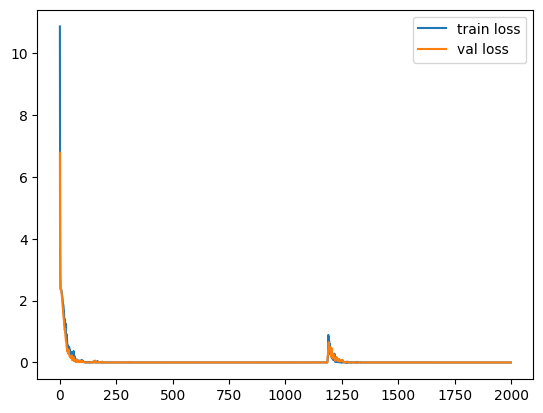

"\n# plot the accuracy\nplt.plot(r.history['accuracy'], label='train acc')\nplt.plot(r.history['val_accuracy'], label='val acc')\nplt.legend()\nplt.show()\nplt.savefig('AccVal_acc')\n"

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
'''
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
'''

In [13]:
from tensorflow.keras.models import load_model

Classifier.save('model.h5')

In [14]:
y_pred = Classifier.predict(test_set)

In [15]:
y_pred

array([[3.22208990e-07, 9.99999404e-01, 2.78830263e-13, 2.86092018e-07,
        2.14963169e-11, 4.55417564e-14, 9.85583360e-13, 4.17910906e-09,
        6.80655601e-11, 8.07454492e-10, 1.34069822e-09],
       [6.42711981e-08, 3.65785496e-07, 9.99986410e-01, 6.24964605e-06,
        2.03466535e-10, 5.33338422e-08, 1.02161800e-06, 5.01975410e-06,
        2.90787447e-08, 8.50765616e-07, 1.68412766e-11],
       [1.29696101e-10, 3.53358361e-14, 1.44762247e-08, 2.20032258e-13,
        1.70086238e-08, 6.32420852e-12, 1.74405079e-06, 1.72950898e-09,
        2.95440116e-15, 9.99998212e-01, 2.57781990e-10],
       [6.03342940e-08, 7.45074225e-09, 3.28197226e-11, 9.99988794e-01,
        8.31365865e-10, 1.14008958e-09, 9.08660969e-09, 8.42645884e-11,
        3.63554803e-12, 1.10326691e-05, 2.17712586e-08],
       [2.01033131e-11, 1.09119138e-20, 1.85234008e-18, 1.98009409e-21,
        8.63666534e-24, 2.50514236e-13, 9.11529560e-14, 1.34622011e-18,
        1.00000000e+00, 5.51595072e-14, 3.93821884e-